In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df_sample = pd.read_csv('C:\\Users\\ConnorRoth\\Documents\\Grad School\\Spring 2023\\DSCI 591\\Datasets\\Global Fire Atlas\\data660k.csv')

In [7]:
df.shape[0]

662530

In [3]:
df_sample = df.sample(frac=0.2, random_state=42)

In [5]:
df_sample.to_csv('../data/data2700k.csv')

In [13]:
df_sample = df.sample(frac=0.05, random_state=42)

In [20]:
df_sample.to_csv('../data/data660k.csv')

In [8]:
## EDA on df_sample

df_sample.head()

,Unnamed: 0,start_date,fire_ID,lat,lon,size,perimeter,start_DOY,end_date,end_DOY,duration,expansion,fire_line,speed,direction,direction_s,landcover,landcover_s,tile_ID,geometry
0,2566038,2005-07-02,584383,-6.7438,22.3535,0.21,1.85,183,2005-07-02,183,1,0.21,0.46,0.46,0,none,8,Woody savannas,h20v09,"POLYGON ((22.35037406370953 -6.74166666610823,..."
1,3258696,2005-12-06,250743,8.8188,3.2881,0.21,1.85,340,2005-12-06,340,1,0.21,0.46,0.46,0,none,9,Savannas,h18v08,POLYGON ((3.2846822924633345 8.820833332498871...
2,5600233,2008-07-27,640420,-15.0104,27.6267,0.86,3.70,209,2008-07-30,212,4,0.21,0.46,0.50,1,north,9,Savannas,h20v10,POLYGON ((27.620844048341272 -15.0041666653687...
3,3644868,2006-09-10,637240,-16.2812,24.7243,1.29,4.63,253,2006-09-10,253,1,1.29,2.78,0.85,0,none,8,Woody savannas,h20v10,POLYGON ((24.720269461331405 -16.2791666652545...
4,7274504,2010-09-24,396369,-12.9688,18.0960,1.71,6.48,267,2010-09-25,268,2,0.86,1.85,0.86,4,southeast,8,Woody savannas,h19v10,POLYGON ((18.090459431003897 -12.9666666655510...


In [9]:
df_sample.drop(['fire_ID', 'start_DOY', 'end_DOY', 'tile_ID', 'geometry'], inplace=True, axis=1)

In [10]:
df_sample.head()

,Unnamed: 0,start_date,lat,lon,size,perimeter,end_date,duration,expansion,fire_line,speed,direction,direction_s,landcover,landcover_s
0,2566038,2005-07-02,-6.7438,22.3535,0.21,1.85,2005-07-02,1,0.21,0.46,0.46,0,none,8,Woody savannas
1,3258696,2005-12-06,8.8188,3.2881,0.21,1.85,2005-12-06,1,0.21,0.46,0.46,0,none,9,Savannas
2,5600233,2008-07-27,-15.0104,27.6267,0.86,3.70,2008-07-30,4,0.21,0.46,0.50,1,north,9,Savannas
3,3644868,2006-09-10,-16.2812,24.7243,1.29,4.63,2006-09-10,1,1.29,2.78,0.85,0,none,8,Woody savannas
4,7274504,2010-09-24,-12.9688,18.0960,1.71,6.48,2010-09-25,2,0.86,1.85,0.86,4,southeast,8,Woody savannas


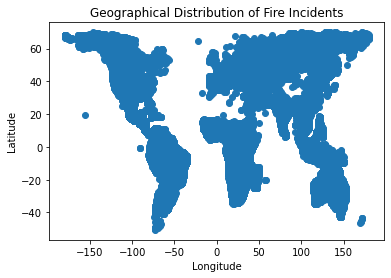

In [11]:
df = df_sample.copy()

plt.scatter(df['lon'], df['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Fire Incidents')
plt.show()

In [12]:
# plotting the lat amd lon on a map
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs='EPSG:4326')
gdf.plot(markersize=0.5, figsize=(10, 10), alpha=0.5, color='red')

ModuleNotFoundError: No module named 'geopandas'

The map shows us how these regions in various continents were affected by the forest fire

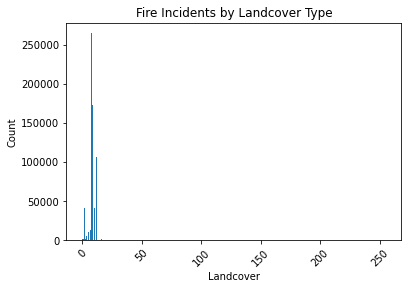

In [13]:
landcover_counts = df['landcover'].value_counts()
plt.bar(landcover_counts.index, landcover_counts.values)
plt.xlabel('Landcover')
plt.ylabel('Count')
plt.title('Fire Incidents by Landcover Type')
plt.xticks(rotation=45)
plt.show()

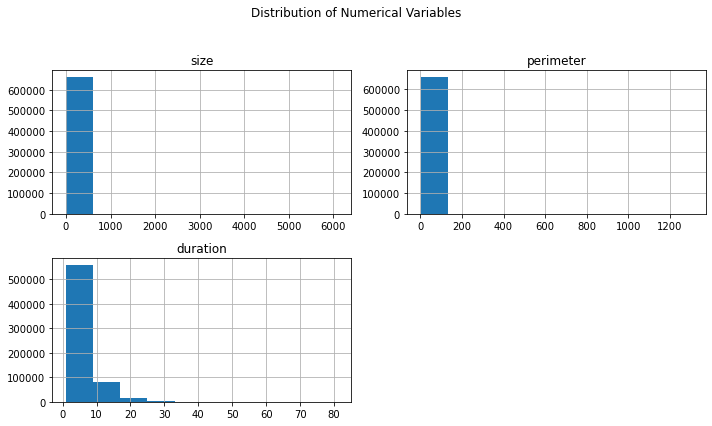

In [14]:
df[['size', 'perimeter', 'duration']].hist(bins=10, figsize=(10, 6))
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Most of the fires in the dataset are of size less than 60, and a perimeter under 150 square km. The duration of the fire has its peak on 5 days.

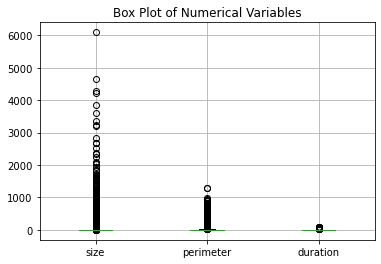

In [15]:
df[['size', 'perimeter', 'duration']].boxplot()
plt.title('Box Plot of Numerical Variables')
plt.show()

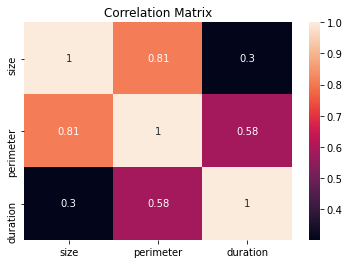

In [16]:
import seaborn as sns

correlation_matrix = df[['size', 'perimeter', 'duration']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Correlation matrix between size perimeter and duration

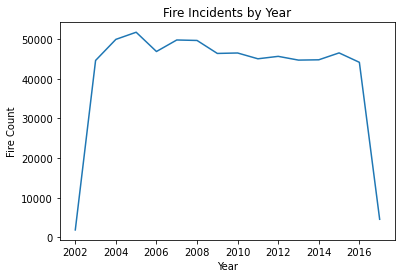

In [17]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year
fire_counts_by_year = df['year'].value_counts().sort_index()
plt.plot(fire_counts_by_year.index, fire_counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Fire Count')
plt.title('Fire Incidents by Year')
plt.show()

Peak each year

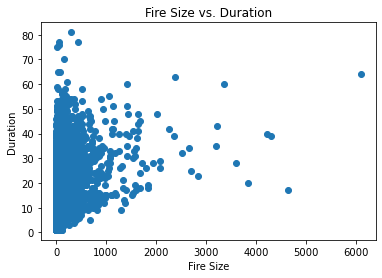

In [18]:
df_cleaned = df.dropna()

plt.scatter(df_cleaned['size'], df_cleaned['duration'])
plt.xlabel('Fire Size')
plt.ylabel('Duration')
plt.title('Fire Size vs. Duration')
plt.show()

Correlation coefficient: 0.3011032391167269
P-value: 0.0


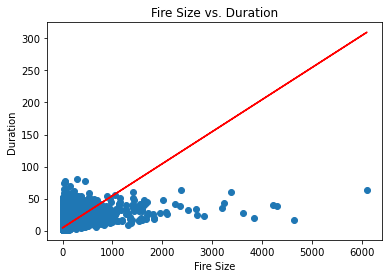

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Calculating the correlation coefficient and p-value
correlation, p_value = pearsonr(df_cleaned['size'], df_cleaned['duration'])
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Plotting the scatter plot
plt.scatter(df_cleaned['size'], df_cleaned['duration'])
plt.xlabel('Fire Size')
plt.ylabel('Duration')
plt.title('Fire Size vs. Duration')

# Fitting a linear regression line
regression_model = LinearRegression()
regression_model.fit(df_cleaned[['size']], df_cleaned['duration'])
plt.plot(df_cleaned['size'], regression_model.predict(df_cleaned[['size']]), color='red')

# Displaying the plot
plt.show()

Graph shows correlation between fire size and Duration, a p-value of zero suggests strong evidence against the null hypothesis and indicates that there is a significant correlation between the variables.

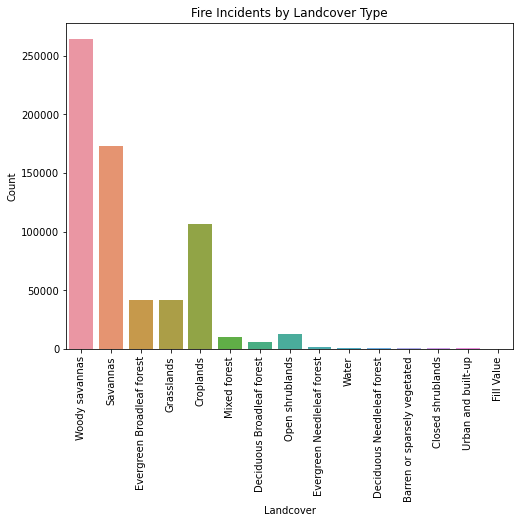

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='landcover_s', data=df)
plt.xlabel('Landcover')
plt.ylabel('Count')
plt.title('Fire Incidents by Landcover Type')
plt.xticks(rotation=90)
plt.show()

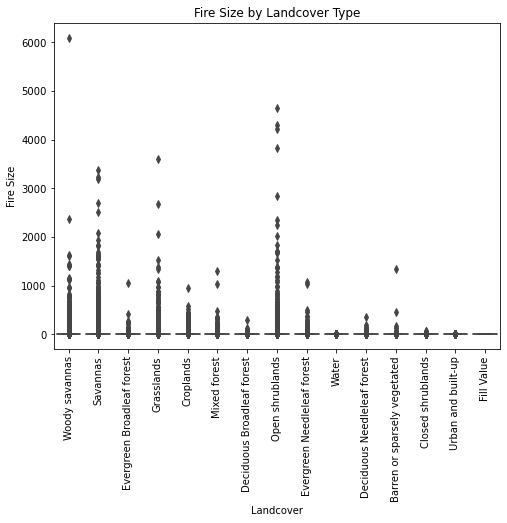

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='landcover_s', y='size', data=df)
plt.xlabel('Landcover')
plt.ylabel('Fire Size')
plt.title('Fire Size by Landcover Type')
plt.xticks(rotation=90)
plt.show()

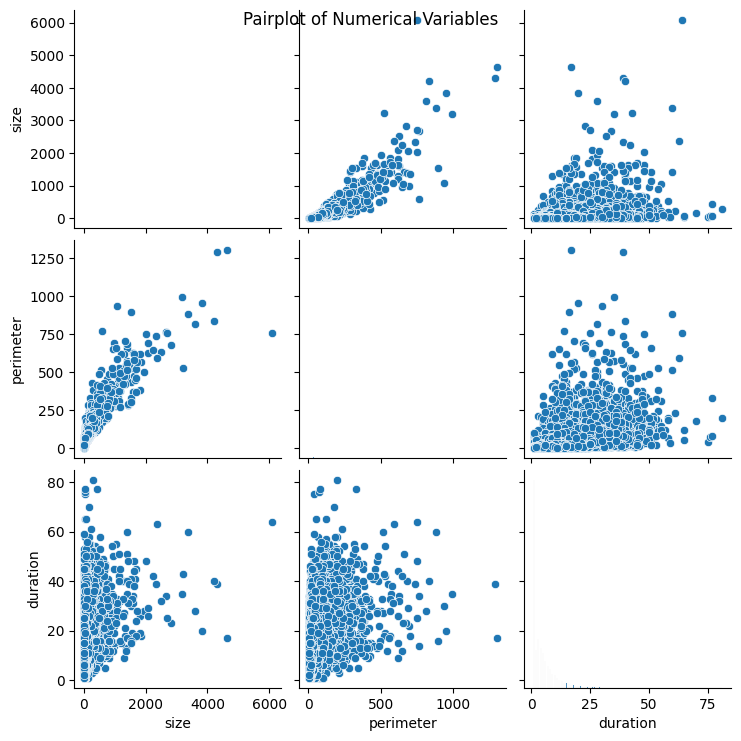

In [42]:
sns.pairplot(df[['size', 'perimeter', 'duration']])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

Graph shows correlation between the scatter points of perimeter and size

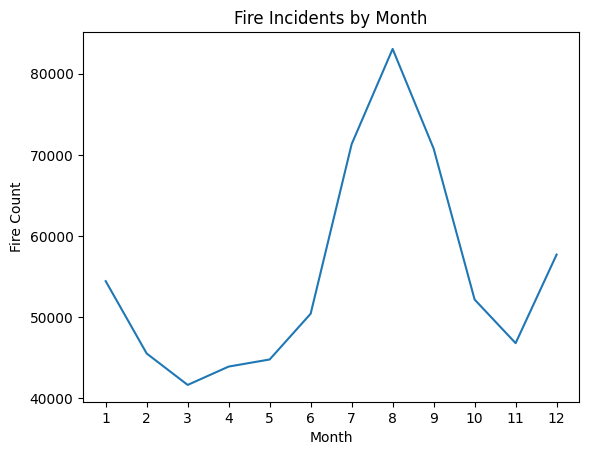

In [43]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = df['start_date'].dt.month
fire_counts_by_month = df['month'].value_counts().sort_index()
plt.plot(fire_counts_by_month.index, fire_counts_by_month.values)
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.title('Fire Incidents by Month')
plt.xticks(range(1, 13))
plt.show()

Most forest fires are in the month 6-7 and 8th of each year

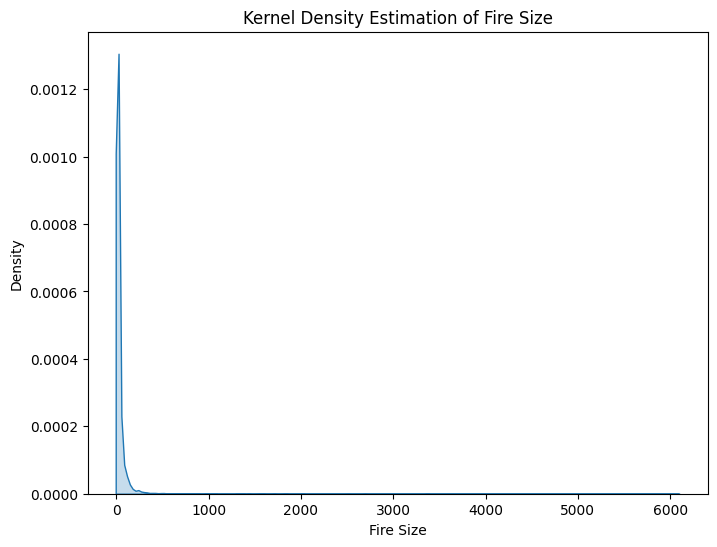

In [45]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['size'], fill=True)
plt.xlabel('Fire Size')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Fire Size')
plt.show()

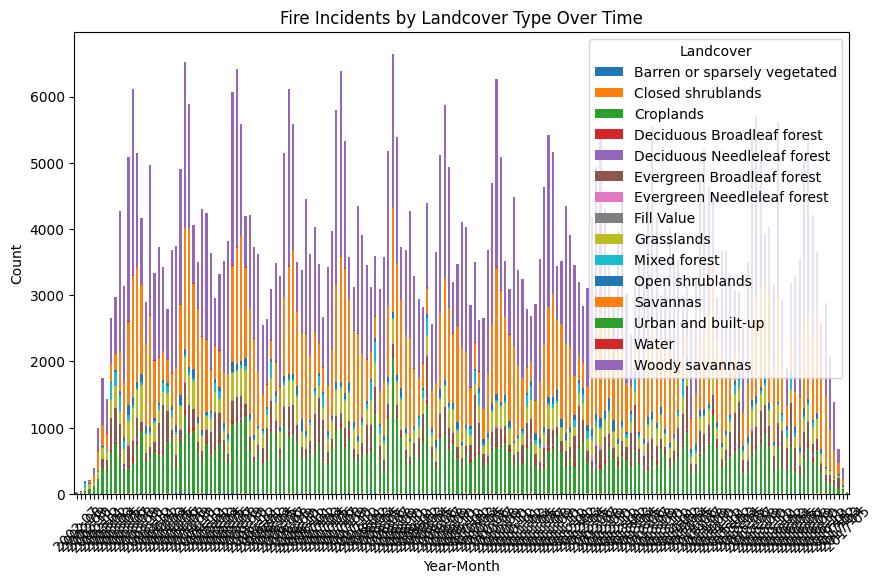

In [47]:
df['year_month'] = df['start_date'].dt.to_period('M')
landcover_counts_by_month = df.groupby(['year_month', 'landcover_s']).size().unstack()
landcover_counts_by_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Fire Incidents by Landcover Type Over Time')
plt.legend(title='Landcover')
plt.xticks(rotation=45)
plt.show()

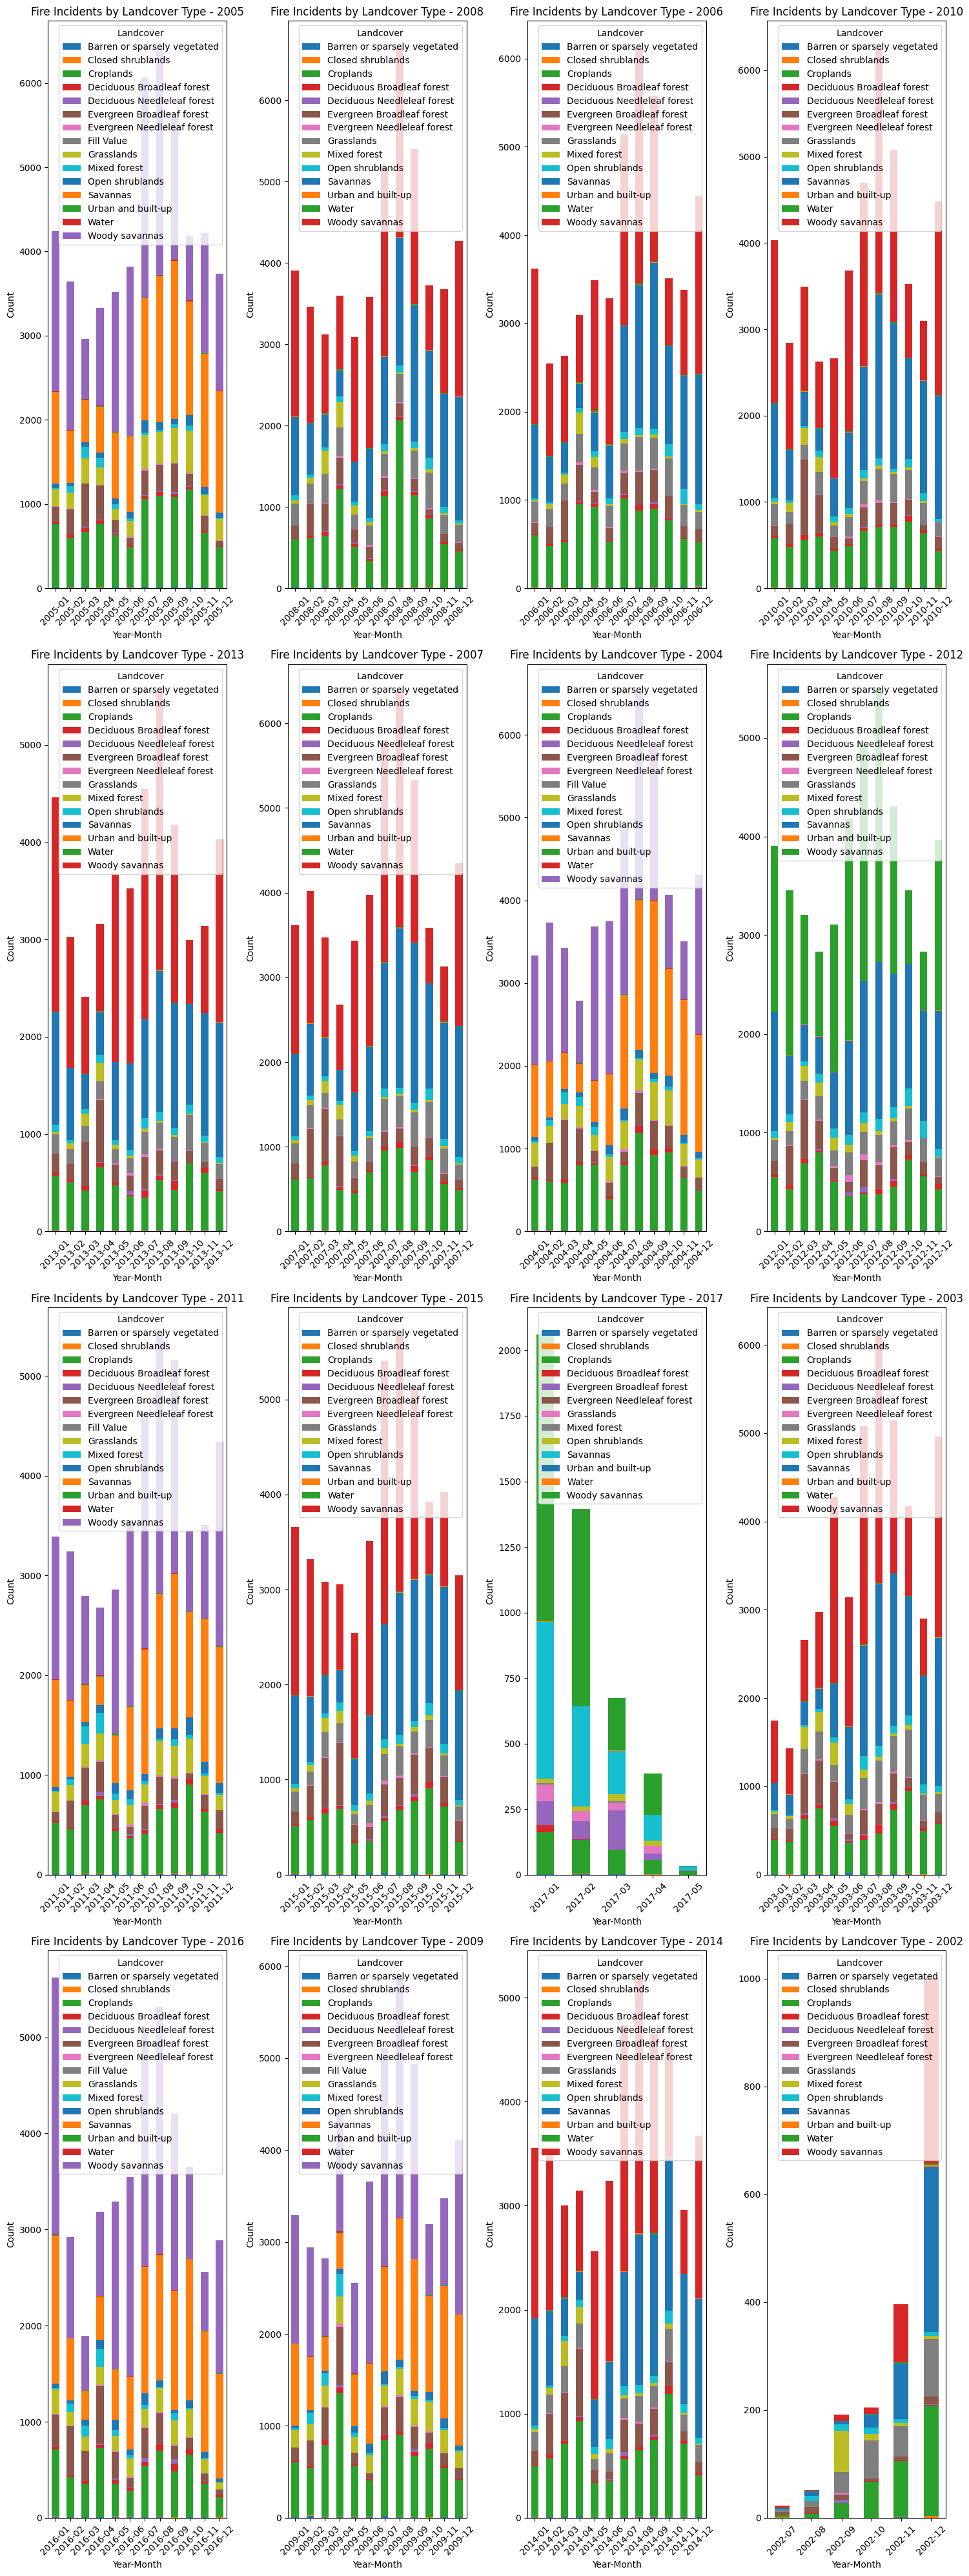

In [70]:
import matplotlib.pyplot as plt
import math

df['year_month'] = df['start_date'].dt.to_period('M')
years = df['start_date'].dt.year.unique()
num_years = len(years)
num_cols = 4
num_rows = math.ceil(num_years / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10*num_rows))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    filtered_df = df[df['start_date'].dt.year == year]
    landcover_counts_by_month = filtered_df.groupby(['year_month', 'landcover_s']).size().unstack()
    landcover_counts_by_month.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Count')
    ax.set_title(f'Fire Incidents by Landcover Type - {year}')
    ax.legend(title='Landcover')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Graph reflects the cases each year and the landcover type associated with each month of fire

In [85]:
df['year_month'] = df['start_date'].dt.to_period('M')
years = df['start_date'].dt.year.unique()

landcover_dict = {}
for i, year in enumerate(years):
    filtered_df = df[df['start_date'].dt.year == year]
    landcover_counts_by_month = filtered_df.groupby(['year_month', 'landcover_s']).size().unstack()
    landcover_dict[year] = landcover_counts_by_month

In [104]:
# merging all the dictionary values into one dataframe
df_merged = pd.concat(landcover_dict.values(), keys=landcover_dict.keys())

df_merged.fillna(0, inplace=True)
df_merged.reset_index(inplace=True)

<Axes: xlabel='landcover_s', ylabel='landcover_s'>

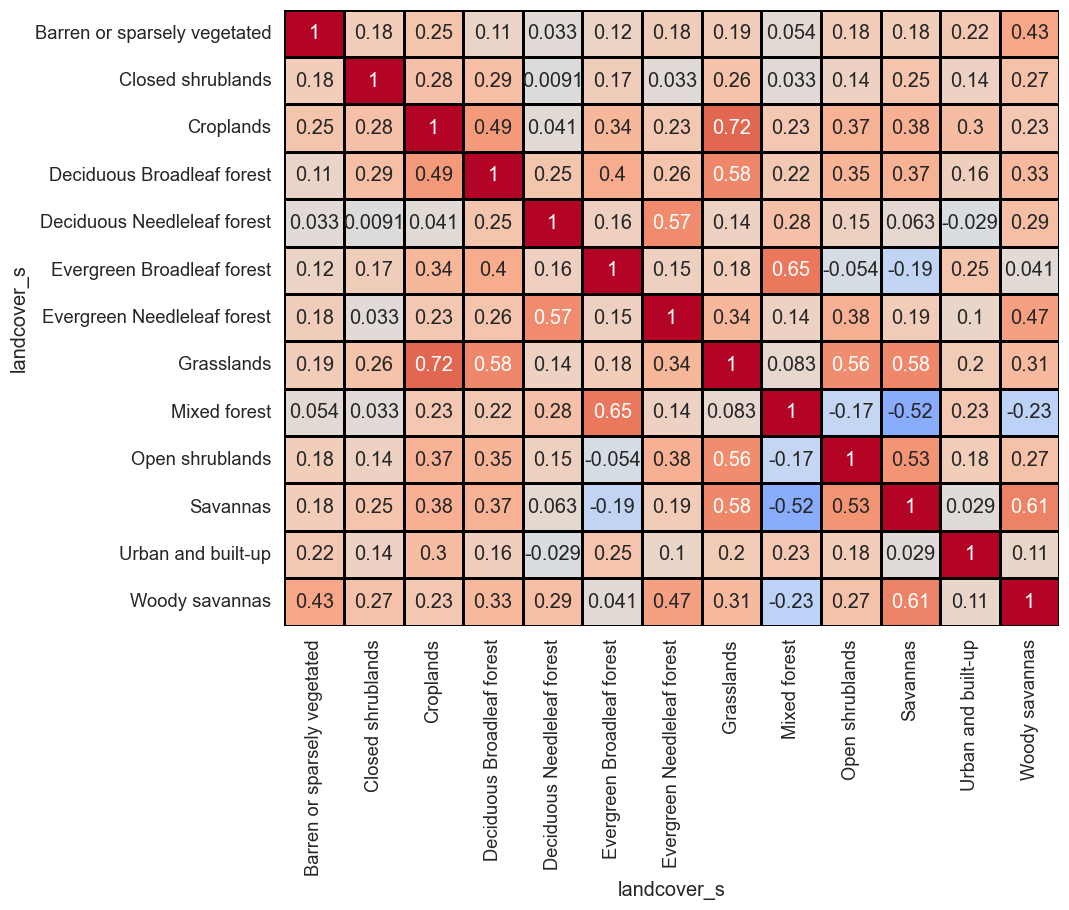

In [122]:
columns_of_interest = ['Barren or sparsely vegetated', 'Closed shrublands', 'Croplands', 'Deciduous Broadleaf forest',
                       'Deciduous Needleleaf forest', 'Evergreen Broadleaf forest', 'Evergreen Needleleaf forest',
                       'Grasslands', 'Mixed forest', 'Open shrublands', 'Savannas', 'Urban and built-up', 'Woody savannas']

# Calculate the correlation matrix
correlation_matrix = df_merged[columns_of_interest].corr()

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black', cbar=False)

Studying relationship between similarity of forest fire in varous landcovers

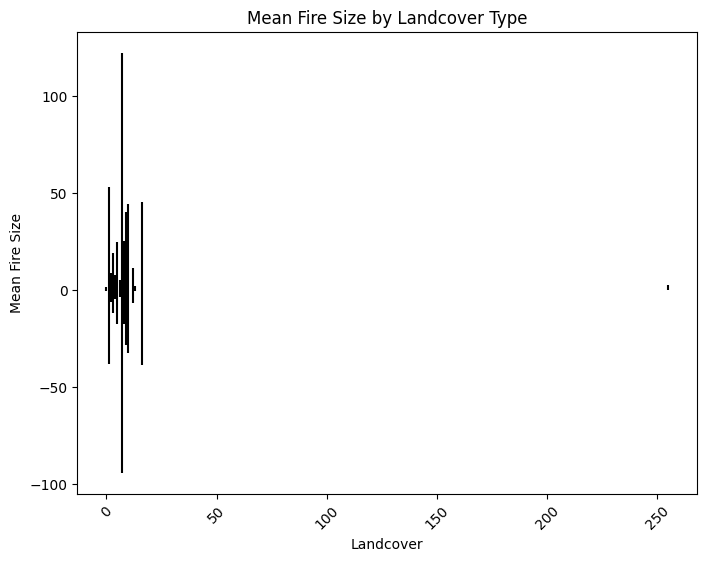

In [51]:
mean_size_by_landcover = df.groupby('landcover')['size'].mean()
std_size_by_landcover = df.groupby('landcover')['size'].std()

plt.figure(figsize=(8, 6))
plt.bar(mean_size_by_landcover.index, mean_size_by_landcover.values, yerr=std_size_by_landcover.values)
plt.xlabel('Landcover')
plt.ylabel('Mean Fire Size')
plt.title('Mean Fire Size by Landcover Type')
plt.xticks(rotation=45)
plt.show()

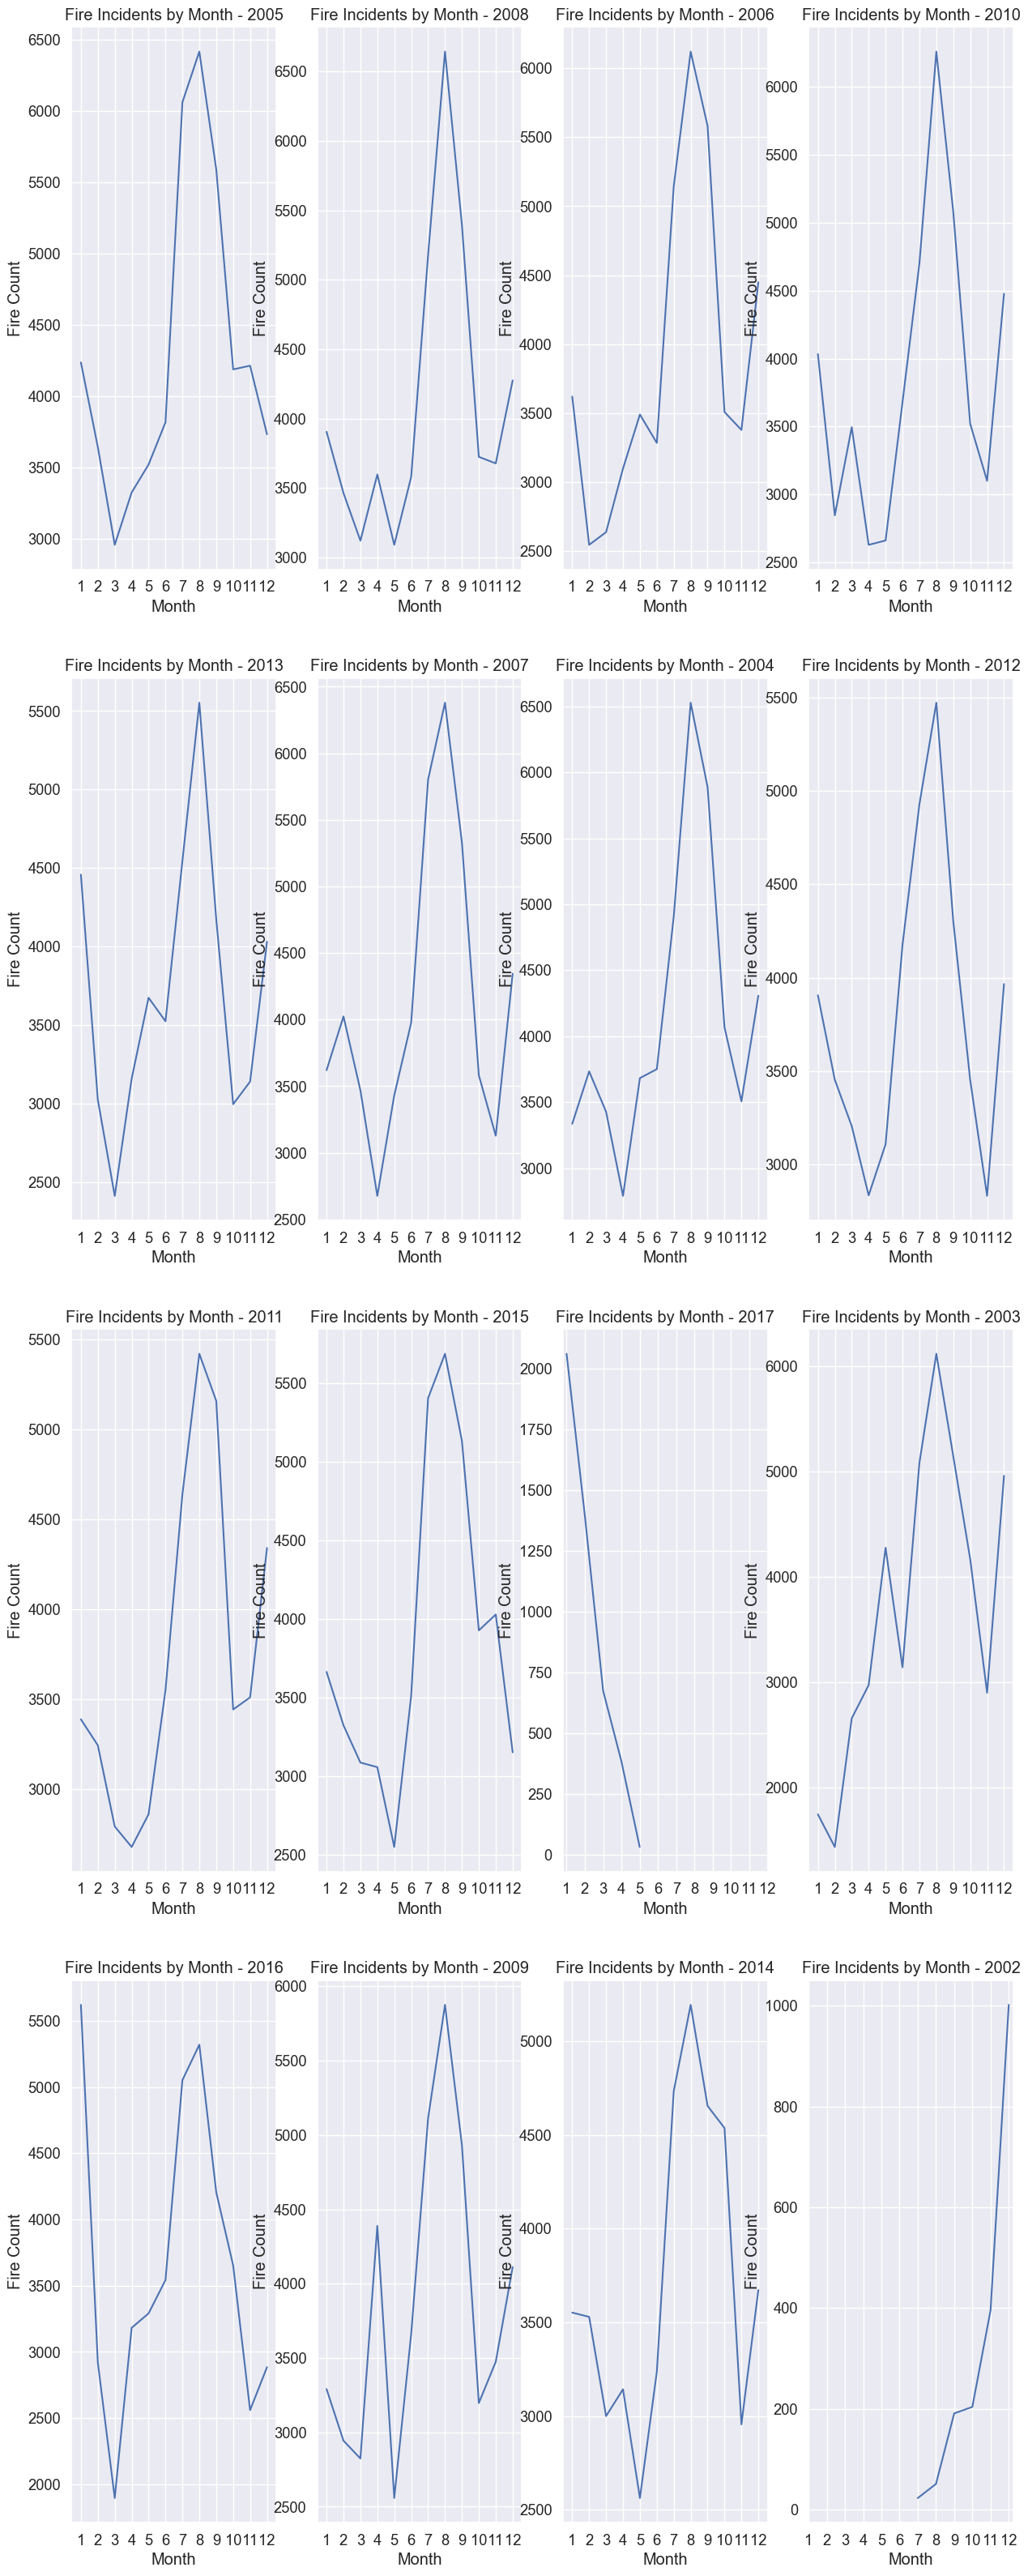

In [137]:
## using the data we have llooking at why the maximmum cases are from the month of July-August-Setember

df['year_month'] = df['start_date'].dt.to_period('M')
years = df['start_date'].dt.year.unique()
num_years = len(years)
num_cols = 4
num_rows = math.ceil(num_years / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10*num_rows))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    filtered_df = df[df['start_date'].dt.year == year]
    fire_counts_by_month = filtered_df['month'].value_counts().sort_index()
    ax.plot(fire_counts_by_month.index, fire_counts_by_month.values)
    ax.set_xlabel('Month')
    ax.set_ylabel('Fire Count')
    ax.set_title(f'Fire Incidents by Month - {year}')
    ax.set_xticks(range(1, 13))

Studying peaks each year

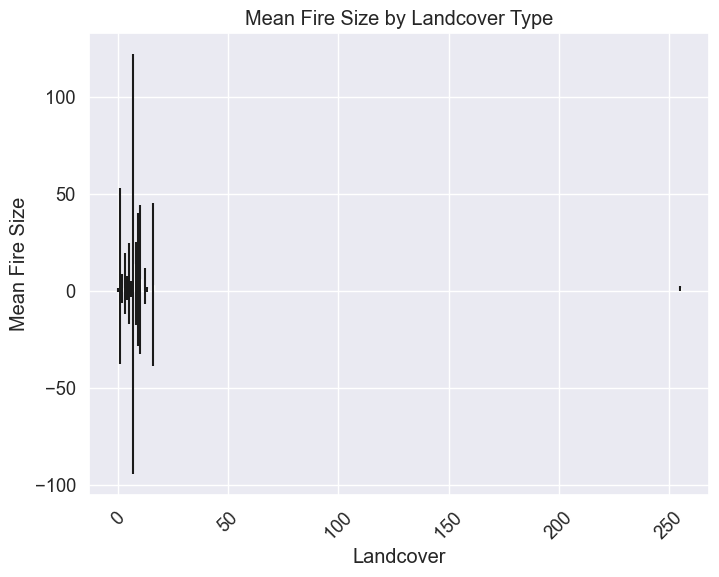

In [162]:
## creating a plot between cases in the month of July-August-Setember and the landcover type to see if there is any relation

df['year_month'] = df['start_date'].dt.to_period('M')
months = df['start_date'].dt.month.unique()

landcover_dict = {}
for i, month in enumerate(months):
    if month == 7 or month == 8 or month == 9:
        filtered_df = df[df['start_date'].dt.month == month]
        landcover_counts_by_month = filtered_df.groupby(['year_month', 'landcover_s']).size().unstack()
        landcover_dict[month] = landcover_counts_by_month
    else:
        continue

# merging all the dictionary values into one dataframe
df_merged = pd.concat(landcover_dict.values(), keys=landcover_dict.keys())

df_merged.fillna(0, inplace=True)
df_merged.reset_index(inplace=True)

# PLOTTING GRAPHS FOR THE MONTH OF JULY-AUGUST-SEPTEMBER

columns_of_interest = ['Barren or sparsely vegetated', 'Closed shrublands', 'Croplands', 'Deciduous Broadleaf forest',
                          'Deciduous Needleleaf forest', 'Evergreen Broadleaf forest', 'Evergreen Needleleaf forest',
                            'Grasslands', 'Mixed forest', 'Open shrublands', 'Savannas', 'Urban and built-up', 'Woody savannas']

plt.figure(figsize=(8, 6))
plt.bar(mean_size_by_landcover.index, mean_size_by_landcover.values, yerr=std_size_by_landcover.values)
plt.xlabel('Landcover')
plt.ylabel('Mean Fire Size')
plt.title('Mean Fire Size by Landcover Type')
plt.xticks(rotation=45)
plt.show()

In [141]:
columns_of_interest = ['Barren or sparsely vegetated', 'Closed shrublands', 'Croplands', 'Deciduous Broadleaf forest',
                          'Deciduous Needleleaf forest', 'Evergreen Broadleaf forest', 'Evergreen Needleleaf forest',
                            'Grasslands', 'Mixed forest', 'Open shrublands', 'Savannas', 'Urban and built-up', 'Woody savannas']

# Calculate the correlation matrix
correlation_matrix = df_merged[columns_of_interest].corr()

<Axes: xlabel='landcover_s', ylabel='landcover_s'>

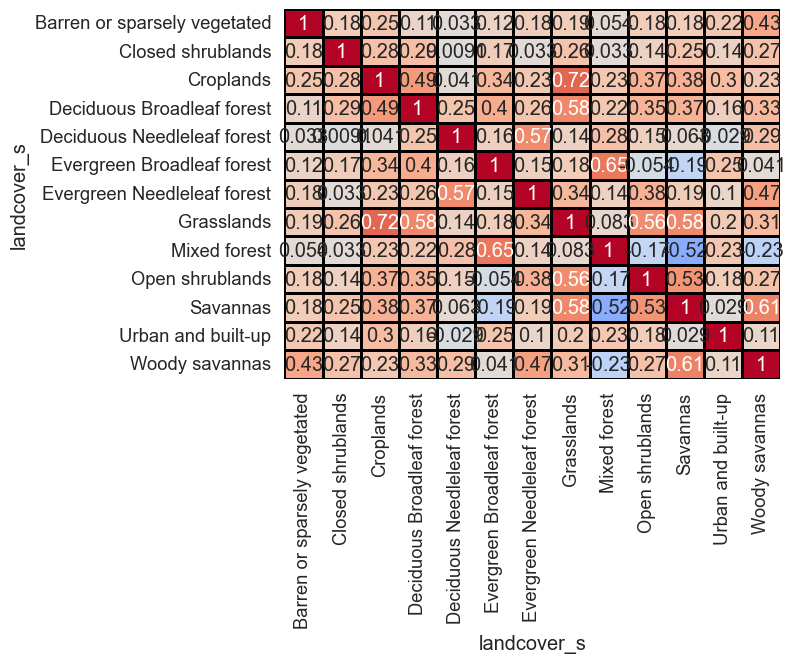

In [142]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black', cbar=False)

In [172]:
from osgeo import gdal

tif_file = '../data/size_monthly/Global_fire_atlas_size_monthly_2003.tif'

ds = gdal.Open(tif_file)
if ds is None:
    print('Failed to open the TIFF file.')
else:
    data = ds.ReadAsArray()
    print('Raster dimensions:', data.shape)
    print('Data type:', data.dtype)

Raster dimensions: (12, 720, 1440)
Data type: float32


In [173]:
print("Minimum value:", np.min(data))
print("Maximum value:", np.max(data))
print("Mean value:", np.mean(data))
print("Standard deviation:", np.std(data))

Minimum value: -9999.0
Maximum value: 7149.849
Mean value: -9861.371
Standard deviation: 1165.8971


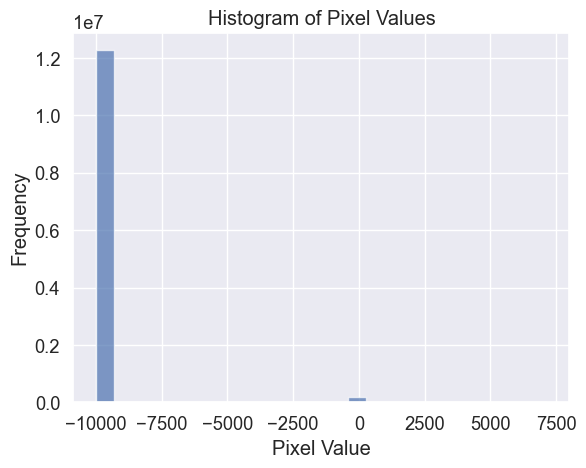

In [175]:
plt.hist(data.flatten(), bins='auto', color='b', alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Histogram of Pixel Values")
plt.show()

(12, 720, 1440)


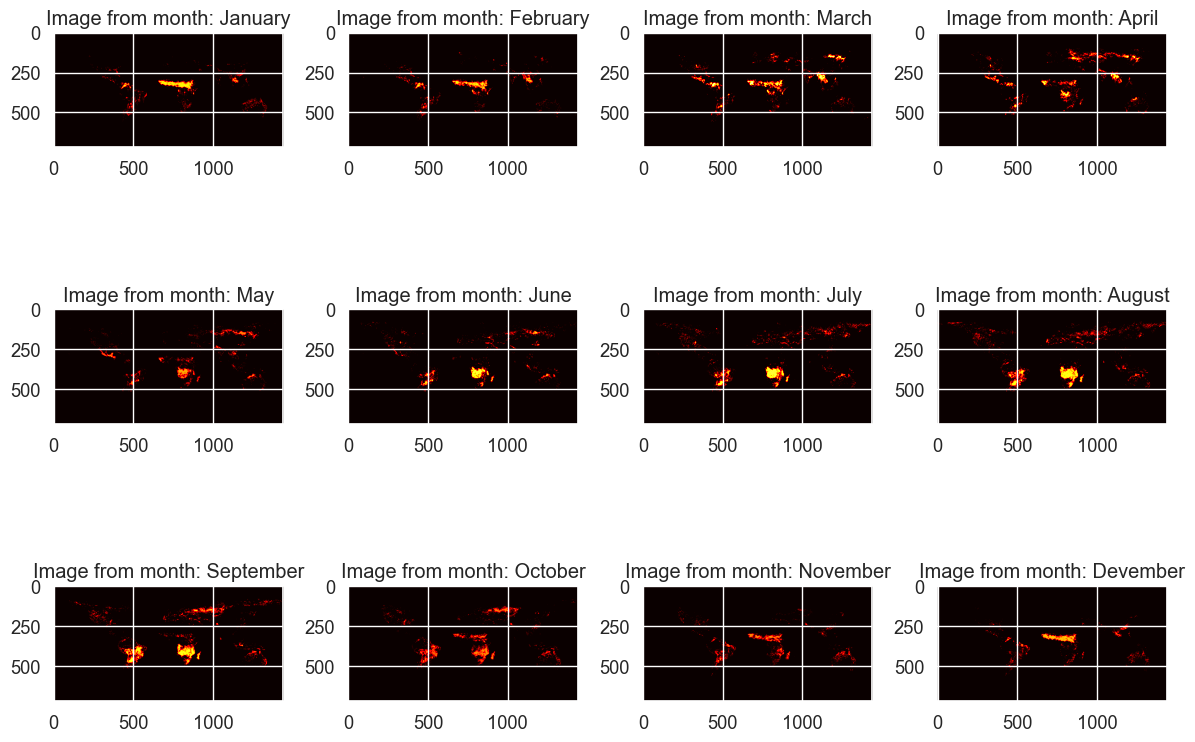

In [184]:
print(data.shape)

import matplotlib.pyplot as plt

# Create subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

# Iterate over the images and plot them
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Devember']

for i, ax in enumerate(axes.flatten()):
    ax.imshow(data[i], cmap='hot')
    ax.set_title(f"Image from month: " + months[i])

plt.tight_layout()
# Show the plot
plt.show()